#Описание проекта

<div align="center"><a href='https://www.kaggle.com/competitions/petfinder-pawpularity-score/overview'><img src="https://storage.googleapis.com/kaggle-competitions/kaggle/25383/logos/header.png?t=2021-08-31-18-49-29"/></a></div>



"*Картина стоит тысячи слов*"

В соревновании [Pawpularity Contest](https://www.kaggle.com/competitions/petfinder-pawpularity-score/overview) на Kaggle предлагается помочь ведущей платформе Малайзии по защите животных определить по фотографиям милоту животных по 100-бальной шкале.

На основе нескольких тысяч фотографий попробуем построить нейронную сеть, определяющую милоту животных 

Помимо фотографий животных имеются также метаданные, на основе которых можно попробовать построить более простые модели, дополняющие основную. 

#Подготовка

##Подключение Kaggle

Установка kaggle

In [ ]:
!pip install kaggle --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Загрузка файла kaggle.json с параметрами подключения к аккаунту

*Выходные данные ячейки ниже были удалены, так как содержали api-ключ*

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Скачивание данных и разархивирование

In [ ]:
!kaggle competitions download -c petfinder-pawpularity-score --force

100% 979M/983M [00:09<00:00, 111MB/s]
100% 983M/983M [00:09<00:00, 107MB/s]


In [ ]:
! unzip petfinder-pawpularity-score.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: train/7e3d6d03218db540c6125630572aa7cd.jpg  
  inflating: train/7e51d9305ec464c1f77cfee35ceb1b4f.jpg  
  inflating: train/7e56aa71d1e091e004703283323e8e7f.jpg  
  inflating: train/7e5d1650d5cda4d68f2ee8ce17c29b25.jpg  
  inflating: train/7e601feb12f2fb03c2d342e54cd47b1e.jpg  
  inflating: train/7e6ca633d2a751af58e1cc220ca519b3.jpg  
  inflating: train/7e717923c22053e51861a24aae701fb0.jpg  
  inflating: train/7e761f47cc1e3038a431f9f196234ab9.jpg  
  inflating: train/7e7921ed945c3c863882340360c9157d.jpg  
  inflating: train/7e8763e28a01c059b7a8d119c5ae0dc0.jpg  
  inflating: train/7e93691bef9bc381590cf004358ee11a.jpg  
  inflating: train/7e947e83394b6d74f1ec4f5b596bed6a.jpg  
  inflating: train/7e9d46bd87849a49ada5f2c336c9d929.jpg  
  inflating: train/7e9df6c36fd06411ce717d0ce761af35.jpg  
  inflating: train/7ea78b0c0bb036b1bbb76b99ec0b731c.jpg  
  inflating: train/7ead412443b3b7f598c53fbf9335caac.jpg  
  in

##Импорт библиотек

Установка недостающих библиотек

In [ ]:
!pip install -q --upgrade wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00


In [ ]:
!pip install -q torchinfo

In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.7 MB/s eta 0:00:00


In [ ]:
!pip uninstall opencv-python -y
!pip uninstall opencv-contrib-python -y
!pip install opencv-contrib-python==4.5.5.62

Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Successfully uninstalled opencv-python-4.7.0.72
Found existing installation: opencv-contrib-python 4.7.0.72
Uninstalling opencv-contrib-python-4.7.0.72:
  Successfully uninstalled opencv-contrib-python-4.7.0.72
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 MB 8.8 MB/s eta 0:00:00


In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 27.2 MB/s eta 0:00:00


Импорт необходимых объектов

In [ ]:
import os
import wandb

import numpy as np
import random
import pandas as pd
import imageio
from sklearn.model_selection import train_test_split
import cv2
from tqdm.notebook import tqdm
import copy

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchmetrics as tm
import torchvision
from torchvision import datasets, models, transforms
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, CosineAnnealingLR, ReduceLROnPlateau, StepLR
from torchinfo import summary

import timm
  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##Создание вспомогательных объектов

Класс конфигурации, содержащий информацию для подключения к wandb, название модели и алгоритма изменения скорости обучения, а также различные параметры

In [ ]:
class CFG:

    num_workers=2
    model_name='resnext101_32x8d' # ['resnext101_32x8d', 'densenet169', 'efficientnet_b0']
    efficientnet = False
    test_split_size = 0.25
    size=224
    scheduler='CosineAnnealingWarmRestarts' # ['StepLR', 'ReduceLROnPlateau', 'CosineAnnealingLR', 'CosineAnnealingWarmRestarts']
    epochs=10

    step_size = 20 # StepLR
    gamma = 0.1 # StepLR

    factor=0.2 # ReduceLROnPlateau
    patience=4 # ReduceLROnPlateau
    eps=1e-6 # ReduceLROnPlateau

    T_max=6 # CosineAnnealingLR

    T_0=6 # CosineAnnealingWarmRestarts

    lr=3e-4
    min_lr=1e-6
    train_batch_size = 64
    test_batch_size = 128
    seed=42
    image_size=256
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

    api = ""
    project = ""
    entity = ""
    wandb = False

Перевод класса конфигурации в словарь

In [ ]:
def class2dict(f):
  return dict((name, getattr(f, name)) for name in dir(f) if not name.startswith('__'))

Фиксирование seed для воспроизводимости

In [ ]:
def seed_everything(seed):
    random.seed(seed) # фиксируем генератор случайных чисел
    os.environ['PYTHONHASHSEED'] = str(seed) # фиксируем заполнения хешей
    np.random.seed(seed) # фиксируем генератор случайных чисел numpy
    torch.manual_seed(seed) # фиксируем генератор случайных чисел pytorch
    torch.cuda.manual_seed(seed) # фиксируем генератор случайных чисел для GPU
    torch.backends.cudnn.deterministic = True # выбираем только детерминированные алгоритмы (для сверток)
    torch.backends.cudnn.benchmark = False # фиксируем алгоритм вычисления сверток

#Обработка данных

Константы для загрузки и обработки изображений

In [ ]:
TRAIN_PATH = "./train"
TEST_PATH = "./test"

IMAGENET_MEAN = np.array([0.485, 0.456, 0.406])
IMAGENET_STD = np.array([0.229, 0.224, 0.225])

Класс для последующей удобной загрузки датасета с помощью DataLoader

In [ ]:
class Pawpularity():
  def __init__(self, transform=None, train=True):
    csv_path = "train.csv"
    img_path = TRAIN_PATH

    table = pd.read_csv(csv_path)[["Id", "Pawpularity"]]
    if train:
      table, _ = train_test_split(table, test_size=CFG.test_split_size, random_state=CFG.seed)
    else:
      _, table = train_test_split(table, test_size=CFG.test_split_size, random_state=CFG.seed)
    self.labels = table["Pawpularity"].values
    self.labels = torch.FloatTensor(self.labels)
    self.images_path = [f"{img_path}/{name}.jpg" for name in table["Id"].values]
    self.transform = transform
  
  def __len__(self):
    return len(self.labels)
  
  def __getitem__(self, id):
    image = cv2.imread(self.images_path[id])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if self.transform:
      image = self.transform(image)
    return image, self.labels[id]


Определение простых аугментаций изображений и загрузка датасетов.

In [ ]:
train_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize([CFG.image_size, CFG.image_size], antialias=True),
     transforms.RandomCrop(244),
     transforms.RandomHorizontalFlip(),
     transforms.RandomVerticalFlip(),
     transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD)])

test_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize([CFG.image_size, CFG.image_size], antialias=True),
     transforms.CenterCrop(244),
     transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD)]
)

train_data = Pawpularity(transform=train_transform, train=True)
test_data = Pawpularity(transform=test_transform, train=False)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=CFG.train_batch_size,
                                          shuffle=True, num_workers=CFG.num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=CFG.test_batch_size,
                                          shuffle=False, num_workers=CFG.num_workers)

Отрисовка картинок

In [ ]:
def imshow(inp, title=None, plt_ax=plt):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = IMAGENET_STD * inp + IMAGENET_MEAN
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

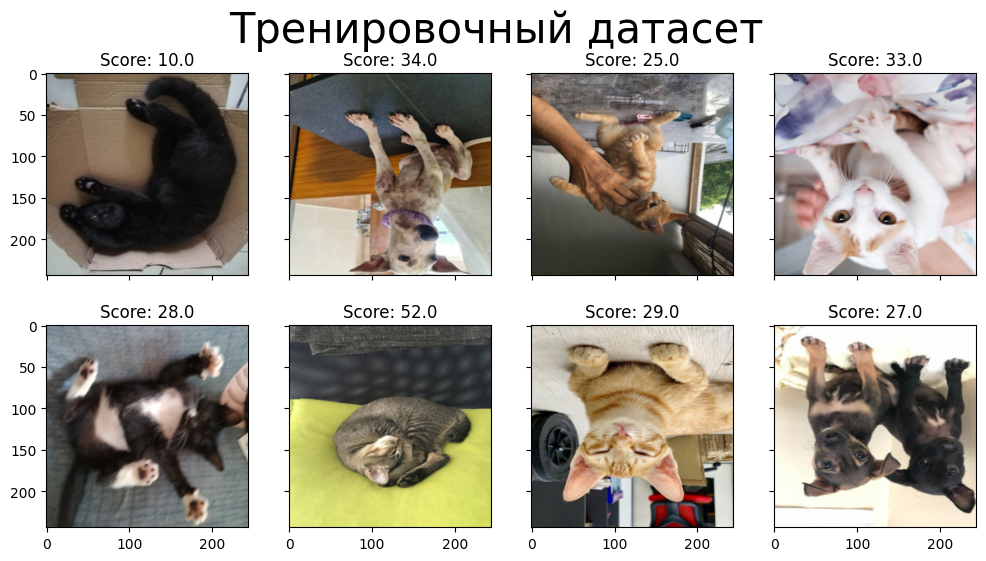

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=4,figsize=(12, 6), \
                        sharey=True, sharex=True)
fig.suptitle('Тренировочный датасет', fontsize=30)
for fig_x in ax.flatten():
    random_img = int(np.random.uniform(0,len(train_data)))
    im_val, label = train_data[random_img]
    img_label = float(label)
    imshow(im_val.data.cpu(), \
          title=f"Score: {img_label}",plt_ax=fig_x)

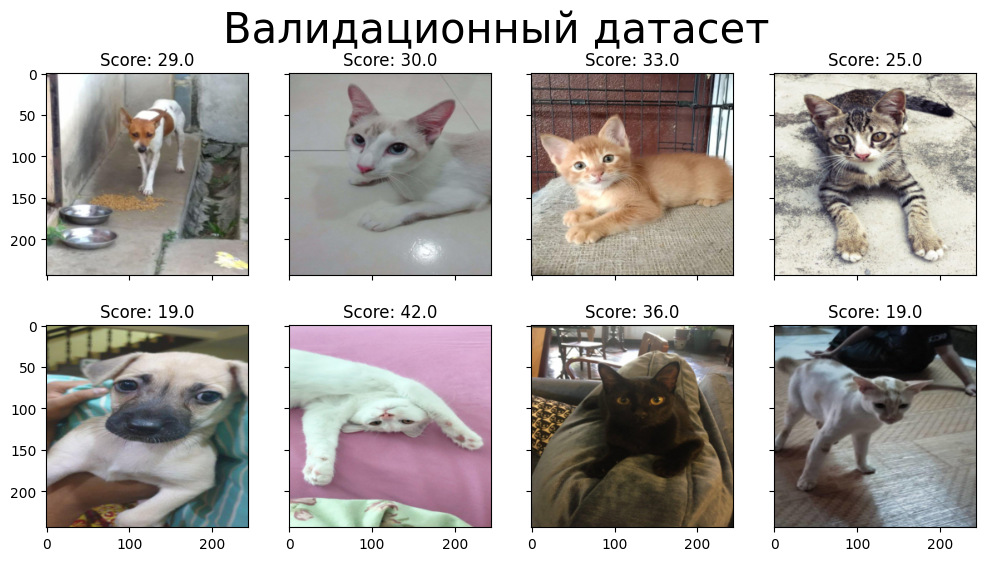

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=4,figsize=(12, 6), \
                        sharey=True, sharex=True)
fig.suptitle('Валидационный датасет', fontsize=30)
for fig_x in ax.flatten():
    random_img = int(np.random.uniform(0,len(test_data)))
    im_val, label = test_data[random_img]
    img_label = float(label)
    imshow(im_val.data.cpu(), \
          title=f"Score: {img_label:.5}",plt_ax=fig_x)

#CNN

Проверка видеокарточки

In [ ]:
!nvidia-smi

Thu Jun  1 12:22:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Различные функции

Отрисовка метрик и, при необходимости, сохранение в файл

In [ ]:
def show_metrics(metrics, title="", xlabel="", ylabel="", path=""):
    plt.figure(figsize=(12, 8))
    plt.plot(metrics['train'], label='train')
    plt.plot(metrics['val'], label='val')
    plt.grid()
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if path:
        plt.savefig(path)
    plt.show()

Функция обучения и инференса модели

In [ ]:
def train_val_model(model, loss, optimizer, scheduler, num_epochs):
 
    loss_hist = {'train':[], 'val':[]}
    RMSE_hist = {'train':[], 'val':[]}
    best_model_weights = model.state_dict()
    best_RMSE = 100.

    if CFG.wandb:
        os.environ["WANDB_API_KEY"] = CFG.api
        wandb.init(project=CFG.project, name=CFG.model_name, entity=CFG.entity, reinit=True, config=class2dict(CFG))

    seed_everything(CFG.seed)

    progress = tqdm(range(num_epochs), desc='Epoch:')
    for epoch in progress:
        for phase in ['train', 'val']:
            if phase == 'train': 
                dataloader = train_loader
                model.train()
            else:
                dataloader = test_loader
                model.eval()
 
            running_loss = 0. 
            running_RMSE = 0.
 
            for inputs, labels in tqdm(dataloader, desc=f'Phase {phase}:'):
                inputs = inputs.to(CFG.device)
                labels = labels.to(CFG.device)
 
                with torch.set_grad_enabled(phase == 'train'):
                    preds = model(inputs)
                    preds_value = preds.view(-1) 
                    loss_value = loss(preds_value, labels)

                    if phase == 'train':
                        optimizer.zero_grad()
                        loss_value.backward()
                        optimizer.step()
                        
                running_loss += loss_value.item()
                running_RMSE += torch.sqrt(tm.functional.mean_squared_error(preds_value, labels)).cpu().detach().numpy()
            
            if phase == "train":
                sheduler.step()
 
            epoch_loss = running_loss / len(dataloader)
            epoch_RMSE = running_RMSE / len(dataloader)
            
            if CFG.wandb and phase == 'train':
              wandb.log({'train_loss': epoch_loss,
                   'train_RMSE': epoch_RMSE})

            if CFG.wandb and phase == 'val':
              wandb.log({'test_loss': epoch_loss,
                   'test_RMSE': epoch_RMSE})
               
            progress.set_description(f'loss: {epoch_loss:.4f}, RMSE: {epoch_RMSE:.4f}')

            if phase == 'val' and epoch_RMSE < best_RMSE:
              best_RMSE = epoch_RMSE
              print(f'Epoch {epoch+1} - Save Best RMSE: {best_RMSE:.2f} Model\n')
              best_model_weights = model.state_dict()
              torch.save(model.state_dict(), '/content/'+f'{CFG.model_name}_best.pth')
              torch.save(model, '/content/'+f'{CFG.model_name}_best.json')
            
            loss_hist[phase].append(epoch_loss)
            RMSE_hist[phase].append(epoch_RMSE)
    
    model.load_state_dict(best_model_weights)
    return model, loss_hist, RMSE_hist

Класс нашей нейронной сети

In [ ]:
class My_Net(torch.nn.Module):
    def __init__(self, model_name='resnet50', pretrained=False, effnet=False, value=False):
        super().__init__()
        self.model = timm.create_model(model_name, pretrained=pretrained)
        
        for param in self.model.parameters():
          param.requires_grad = False
        
        if effnet:
          fc_inputs = self.model.classifier.in_features
        else:
          fc_inputs = self.model.fc.in_features
        second_inputs = fc_inputs // 2
        head = nn.Sequential(nn.Linear(fc_inputs, second_inputs),
                             nn.ReLU(),
                             nn.Linear(second_inputs, 1))
        if effnet:
          self.model.classifier = head
        else:
          self.model.fc = head

    def forward(self, x):
        x = self.model(x)
        return x

Функция выбора алгоритма изменения скорости обучения

In [ ]:
def get_scheduler(optimizer):
        if CFG.scheduler=='ReduceLROnPlateau':
          scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG.factor, patience=CFG.patience, verbose=True, eps=CFG.eps)
        elif CFG.scheduler=='StepLR':
          scheduler = StepLR(optimizer, step_size=CFG.step_size, gamma=CFG.gamma)
        elif CFG.scheduler=='CosineAnnealingLR':
          scheduler = CosineAnnealingLR(optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
          scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG.T_0, T_mult=1, eta_min=CFG.min_lr, last_epoch=-1)
        return scheduler

Создание модели, выбор оптимизатора и алгоритма изменения его скорости обучения

In [ ]:
model = My_Net(CFG.model_name, pretrained=True, effnet=CFG.efficientnet, value=False)
model = model.to(CFG.device)
 
loss = nn.MSELoss()
if CFG.efficientnet:
  params = model.model.classifier.parameters()
else:
  params = model.model.fc.parameters()
optimizer = optim.Adam(params, lr=CFG.lr)
sheduler = get_scheduler(optimizer)

Информация о получившейся модели

In [ ]:
summary(model=model, 
        input_size=(CFG.train_batch_size, 3, 256, 256),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20
)

Layer (type:depth-idx)                        Input Shape          Output Shape         Param #              Trainable
My_Net                                        [64, 3, 256, 256]    [64, 1]              --                   Partial
├─ResNet: 1-1                                 [64, 3, 256, 256]    [64, 1]              --                   Partial
│    └─Conv2d: 2-1                            [64, 3, 256, 256]    [64, 64, 128, 128]   (9,408)              False
│    └─BatchNorm2d: 2-2                       [64, 64, 128, 128]   [64, 64, 128, 128]   (128)                False
│    └─ReLU: 2-3                              [64, 64, 128, 128]   [64, 64, 128, 128]   --                   --
│    └─MaxPool2d: 2-4                         [64, 64, 128, 128]   [64, 64, 64, 64]     --                   --
│    └─Sequential: 2-5                        [64, 64, 64, 64]     [64, 256, 64, 64]    --                   False
│    │    └─Bottleneck: 3-1                   [64, 64, 64, 64]     [64, 256, 6

Обучение

In [ ]:
trained_model, losses, RMSEs = train_val_model(model, loss, optimizer, sheduler, CFG.epochs)

test_RMSE,█▇▆▆▄▃▂▂▁▁
test_loss,█▆▆▆▄▃▂▂▁▁
train_RMSE,█▇▅▅▅▃▃▂▁▁
train_loss,█▇▅▅▅▃▃▂▁▁
test_RMSE,21.00325
test_loss,444.57646
train_RMSE,20.27343
train_loss,416.5494


Epoch::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/117 [00:00<?, ?it/s]

Phase val::   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1 - Save Best RMSE: 21.48 Model



Phase train::   0%|          | 0/117 [00:00<?, ?it/s]

Phase val::   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 2 - Save Best RMSE: 20.73 Model



Phase train::   0%|          | 0/117 [00:00<?, ?it/s]

Phase val::   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 3 - Save Best RMSE: 19.88 Model



Phase train::   0%|          | 0/117 [00:00<?, ?it/s]

Phase val::   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 4 - Save Best RMSE: 19.73 Model



Phase train::   0%|          | 0/117 [00:00<?, ?it/s]

Phase val::   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 5 - Save Best RMSE: 19.68 Model



Phase train::   0%|          | 0/117 [00:00<?, ?it/s]

Phase val::   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 6 - Save Best RMSE: 19.61 Model



Phase train::   0%|          | 0/117 [00:00<?, ?it/s]

Phase val::   0%|          | 0/20 [00:00<?, ?it/s]

Phase train::   0%|          | 0/117 [00:00<?, ?it/s]

Phase val::   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 8 - Save Best RMSE: 19.34 Model



Phase train::   0%|          | 0/117 [00:00<?, ?it/s]

Phase val::   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 9 - Save Best RMSE: 19.30 Model



Phase train::   0%|          | 0/117 [00:00<?, ?it/s]

Phase val::   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 10 - Save Best RMSE: 19.30 Model



Вывод метрики

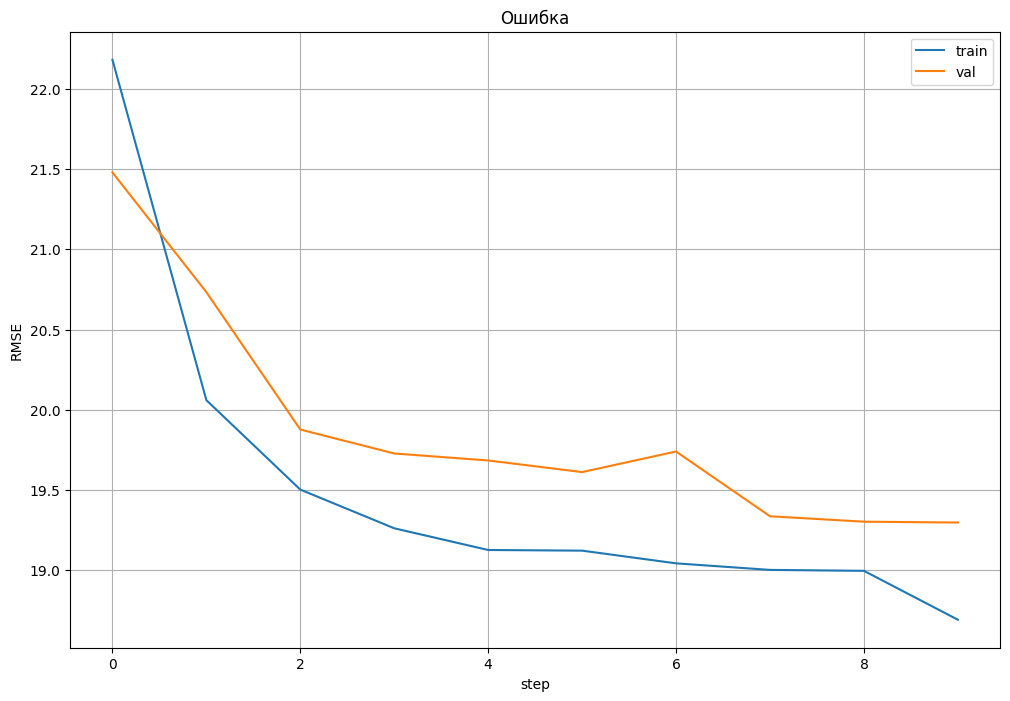

In [ ]:
show_metrics(RMSEs, "Ошибка", "step", "RMSE", "metrics.png")

По итогам экспериментов, наилучшая получившаяся модель [pth](https://drive.google.com/file/d/1IPmzy7WVMhKHjKNLA_0RioVO70RlFc4e/view?usp=sharing) | [json](https://drive.google.com/file/d/1WEwJlYJIbb5CyaXVqLSC9LTg67M45ooy/view?usp=sharing):

* Основа: densenet169
* Классифицирующая голова: 1664 -> ReLU -> 832 -> 1
* Оптимизатор: Adam
* Алгоритм изменения скорости обучения: CosineAnnealingWarmRestarts

TEST RMSE: 19.052

TRAIN RMSE: 18.662

In [ ]:
api = wandb.Api()

In [ ]:
run = api.run(f"renhas/Pawpularity/w004d9x9")
run.display(800)

True

# Классические модели ML

## Импорт дополнительных библиотек

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.1 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

from catboost import CatBoostRegressor

from scipy.stats import boxcox
from scipy.special import inv_boxcox

## Вспомогательные объекты

Класс для более удобного считывания метаданных изображений

In [ ]:
class PawpularityMeta():
  def __init__(self):
    table = pd.read_csv("train.csv").drop(["Id"], axis=1)
    self.train_dt, self.test_dt = train_test_split(table, test_size=CFG.test_split_size, random_state=CFG.seed)
    
    self.X_train = self.train_dt.drop(["Pawpularity"], axis=1)
    self.Y_train = self.train_dt["Pawpularity"]

    self.X_test = self.test_dt.drop(["Pawpularity"], axis=1)
    self.Y_test = self.test_dt["Pawpularity"]

Функция для тестирования и валидации классических моделей

In [ ]:
def train_and_valid(model, fitures_scaler, params_to_search=None):
  seed_everything(CFG.seed)
  dt = PawpularityMeta()
  Y_train, lambda_boxcox = boxcox(dt.Y_train)
  
  X_train = pd.DataFrame(fitures_scaler.fit_transform(dt.X_train), columns=dt.X_train.columns,
                         index=dt.X_train.index)
  X_test = pd.DataFrame(fitures_scaler.transform(dt.X_test), columns=dt.X_test.columns,
                        index=dt.X_test.index)
  if params_to_search:
    searcher = RandomizedSearchCV(
        model,
        param_distributions=params_to_search,
        scoring=["neg_root_mean_squared_error", "r2"],
        cv=5,
        n_jobs=-1,
        return_train_score=True,
        n_iter=10,
        verbose=3,
        refit="neg_root_mean_squared_error"
    )

    searcher.fit(X_train, Y_train)

    print(f"Лучшие параметры: {searcher.best_params_}")

    model = searcher.best_estimator_
  else:
    model.fit(X_train, Y_train)  

  predicted_test = model.predict(X_test)
  predicted_test = inv_boxcox(predicted_test, lambda_boxcox)
  predicted_train = model.predict(X_train)
  predicted_train = inv_boxcox(predicted_train, lambda_boxcox)

  train_RMSE = mse(dt.Y_train, predicted_train, squared=False)
  test_RMSE = mse(dt.Y_test, predicted_test, squared=False)

  print(f"Train RMSE: {train_RMSE}")
  print(f"Test RMSE: {test_RMSE}")

## Простое исследование данных

Посмотрим на имеющиейся метаданные

In [ ]:
dt = PawpularityMeta()

In [ ]:
dt.train_dt.describe()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
count,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000
mean,0.028921,0.769169,0.901264,0.864945,0.009685,0.067662,0.127253,0.049368,0.169492,0.175007,0.059457,0.074119,38.005381
std,0.167596,0.421393,0.298327,0.341805,0.097942,0.251182,0.333279,0.216649,0.375211,0.379998,0.236493,0.261982,20.428491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [ ]:
dt.train_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7434 entries, 3680 to 7270
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Subject Focus  7434 non-null   int64
 1   Eyes           7434 non-null   int64
 2   Face           7434 non-null   int64
 3   Near           7434 non-null   int64
 4   Action         7434 non-null   int64
 5   Accessory      7434 non-null   int64
 6   Group          7434 non-null   int64
 7   Collage        7434 non-null   int64
 8   Human          7434 non-null   int64
 9   Occlusion      7434 non-null   int64
 10  Info           7434 non-null   int64
 11  Blur           7434 non-null   int64
 12  Pawpularity    7434 non-null   int64
dtypes: int64(13)
memory usage: 813.1 KB


In [ ]:
dt.test_dt.describe()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
count,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.00000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000
mean,0.023810,0.782889,0.912026,0.851493,0.010896,0.06820,0.135593,0.050444,0.156578,0.163035,0.066586,0.059322,38.140032
std,0.152486,0.412362,0.283315,0.355673,0.103834,0.25214,0.342425,0.218903,0.363476,0.369472,0.249354,0.236274,21.078744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [ ]:
dt.test_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2478 entries, 2830 to 2436
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Subject Focus  2478 non-null   int64
 1   Eyes           2478 non-null   int64
 2   Face           2478 non-null   int64
 3   Near           2478 non-null   int64
 4   Action         2478 non-null   int64
 5   Accessory      2478 non-null   int64
 6   Group          2478 non-null   int64
 7   Collage        2478 non-null   int64
 8   Human          2478 non-null   int64
 9   Occlusion      2478 non-null   int64
 10  Info           2478 non-null   int64
 11  Blur           2478 non-null   int64
 12  Pawpularity    2478 non-null   int64
dtypes: int64(13)
memory usage: 271.0 KB


Пропусков нет, все признаки числовые. Посмотрим на распределение таргентного значения

Text(0.5, 0, 'Милота животного')

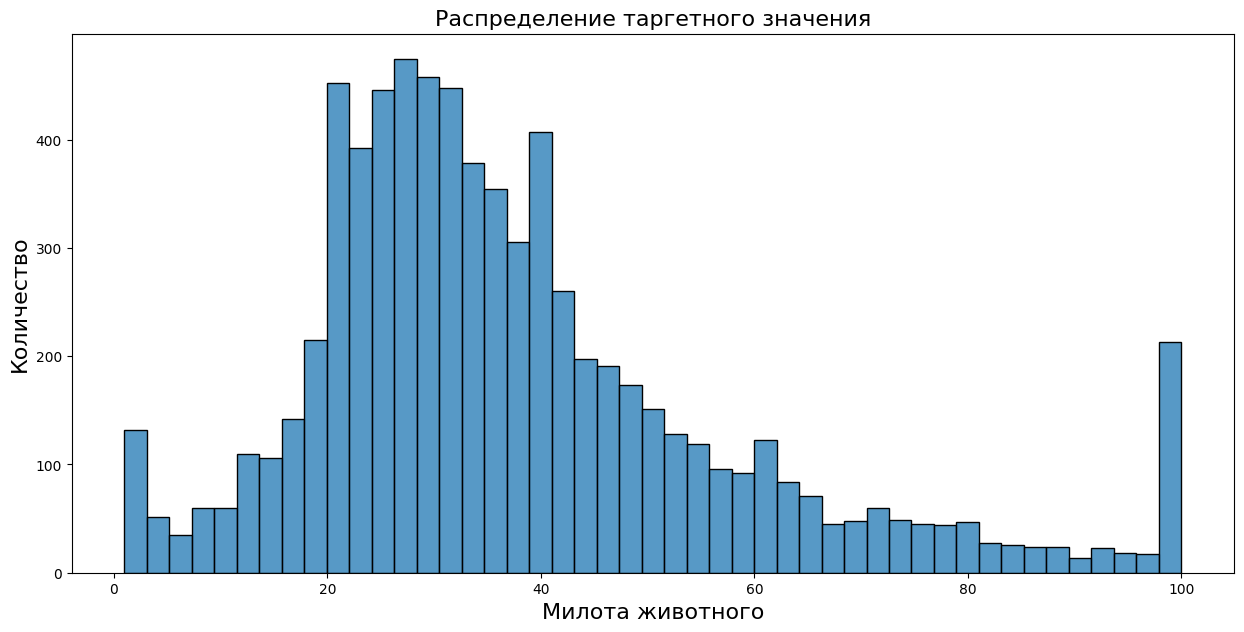

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = sns.histplot(data=dt.Y_train)
ax.set_title('Распределение таргетного значения', fontsize= 16)
ax.set_ylabel('Количество', fontsize= 16)
ax.set_xlabel('Милота животного', fontsize= 16)

Распределение похоже на нормальное, но смещено влево. Попробуем применить метод Бокса-Кокса.

In [ ]:
Y_train, lambda_boxcox = boxcox(dt.Y_train)

Text(0.5, 0, 'Милота животного')

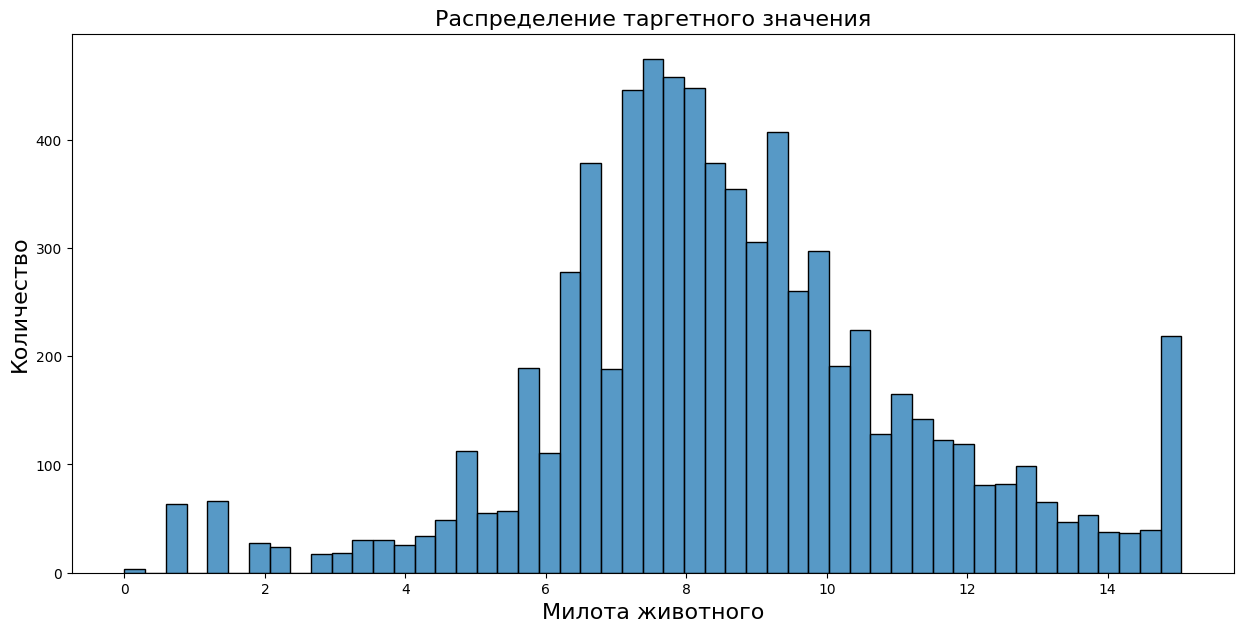

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = sns.histplot(data=Y_train)
ax.set_title('Распределение таргетного значения', fontsize= 16)
ax.set_ylabel('Количество', fontsize= 16)
ax.set_xlabel('Милота животного', fontsize= 16)

Преобразование помогло изабавиться от смещения значений влево

## Поиск наилучшей модели

In [ ]:
SS = StandardScaler()

In [ ]:
LR = LinearRegression()

train_and_valid(LR, SS)

Train RMSE: 20.61809952503253
Test RMSE: 21.29289424350134


In [ ]:
SGD = SGDRegressor()

train_and_valid(SGD, SS)

Train RMSE: 20.67697052414047
Test RMSE: 21.358256162873804


In [ ]:
DT = DecisionTreeRegressor(max_depth=1)

train_and_valid(DT, SS)

Train RMSE: 20.6385710609349
Test RMSE: 21.31184980199188


In [ ]:
estimators=[
    ("LR", LR),
    ("SGD", SGD),
    ("DT", DT)
]

BR = StackingRegressor(estimators, SGD)

train_and_valid(BR, SS)

Train RMSE: 20.417294931425925
Test RMSE: 21.08632966130522


In [ ]:
RF = RandomForestRegressor()

params = {
    "n_estimators": np.linspace(100, 300, 3, dtype=np.int64),
    "max_depth": list(np.linspace(1, 100, 20, dtype=np.int64)) + [None],
}

train_and_valid(RF, SS, params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие параметры: {'n_estimators': 100, 'max_depth': 1}
Train RMSE: 20.634430445616207
Test RMSE: 21.299861796699627


In [ ]:
CB = CatBoostRegressor(verbose=False)

params = {
    "learning_rate": np.linspace(CFG.min_lr, CFG.lr * 3, 10),
    "depth": range(1, 5),
    "iterations": range(10, 511, 100)
}

train_and_valid(CB, SS, params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие параметры: {'learning_rate': 0.0003006666666666667, 'iterations': 510, 'depth': 4}
Train RMSE: 20.63558595681618
Test RMSE: 21.29893871114117


Наилучший результат показал стэкинг из Линейного и SGD регрессоров, а также одного дерева небольшой глубины. Как видно из метрик, классические модели не так уж и сильно уступают нейронными сетям, так что как более простая и лёгкая альтернатива вполне подходят